In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure

In [2]:
WIDTH = 17
LENGTH = 15
CmToInch = lambda x: x/2.54
figure(figsize=(CmToInch(25), CmToInch(25)))

<Figure size 984.252x984.252 with 0 Axes>

<Figure size 984.252x984.252 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import numpy as np
from scipy.optimize import curve_fit

figure_width = 18.  # cm
figure_height = 20. # cm

def find_error_2_measurements(y_array, const_error):
    """
    Finds array of errors calculation based on Student destribution, const_error = smallest value of measurement scale
    """
    T = 2.9
    return np.array([T*np.sqrt(np.abs((i**2-j**2)/2)) for i, j in y_array.T]) + const_error

def func_width(x, A, h, d):
    return A*(1-np.exp(-h*x)) + d

def func_voltage(x, A, b, c, d, e, F):
    return A*np.exp(-(b*x-c)**2/e)

def func_voltage_2(x, A, b, c, e):
    return A*np.exp(-(b*x-c)**2/e)

def draw_graph(width, height, x, y, x_axis, y_axis, name, graph_name, margins_array=[2, 1, 2, 2], x_mod=1, y_mod=1, 
    max_y=None, min_y=None, approximation_function=None, other_function=None):
    """
    PARAMETERS DESCRIPTION:
        width - GRAPH WIDTH IN CM
        height - GRAPH HEIGHT IN CM
        x - X AXIS DATA
        y - Y AXIS DATA
        graph_name - NAME OF GRAPH TO SAVE WITH
        margins_array - ARRAY OF MARGINS (LEFT, RIGHT, TOP, BOTTOM) IN CM
        min_y - BOTTOM LIMIT GRAPH BY Y AXIS, IF NONE - MAKE 0
        max_y - TOP LIMIT GRAPH BY Y AXIS, IF NONE - MAKE 1.1*MAX(Y)
        x_axis - NAME OF X_AXIS
        y_axis - NAME OF Y_AXIS
        name - NAME OF GRAPH LOCATED BY IT'S TOP
        x_mod - VALUE THAT WE SHOULD MULTIPLY DATA IN X AXIS TO
        y_mod - VALUE THAT WE SHOULD MULTIPLE DATA IN Y AXIS TO
    """
    if min_y is None:
        min_y = 0
    if max_y is None:
        max_y = 1.1*np.max(y)
    
    _fontsize_legend = 10
    _fontsize = 15

    DP = 2

    left_margin, right_margin, top_margin, bottom_margin = margins_array

    box_width = left_margin + width + right_margin   # cm
    box_height = top_margin + height + bottom_margin # cm

    cm2inch = 1/2.54 # inch per cm

    fig = plt.figure(figsize=(box_width*cm2inch,box_height*cm2inch), dpi=120, facecolor='w', edgecolor='k')
    ##fig = plt.figure()
    fig.canvas.draw()
    ax = plt.gca()

    x_mod_base10 = 1 #if np.log10(x_mod)>=2 else round(np.log10(x_mod))
    y_mod_base10 = 0 if np.log10(y_mod)>=2 else round(np.log10(y_mod))
    # make lambda formatters
    y_formatter = lambda y, pos: f"{y*y_mod:.{y_mod_base10}f}"
    x_formatter = lambda x, pos: f"{x*x_mod:.{x_mod_base10}f}"

    # set up axis
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # find errors and middle value
    error_values = find_error_2_measurements(y, 0.15)
    mid_y = [(i+j)/2 for i, j in y.T]

    # draw points
    ax.scatter(x, mid_y, c='red', label="Измерянные значения")

    # draw errors
    ax.plot([x[0], x[0]], [mid_y[0]-error_values[0], mid_y[0]+error_values[0]], linewidth=0.5, c='blue', linestyle="-", label='Доверительный интервал')
    for c, (i, j) in enumerate(zip(x, error_values)):
        ax.plot([i, i], [mid_y[c]-j, mid_y[c]+j], linewidth=0.5, c='blue', linestyle="-")
        ax.plot([i-0.05, i+0.05], [mid_y[c]-j, mid_y[c]-j], linewidth=0.5, c='blue', linestyle="-")
        ax.plot([i-0.05, i+0.05], [mid_y[c]+j, mid_y[c]+j], linewidth=0.5, c='blue', linestyle="-")

    # draw approximating function
    if approximation_function is not None:
        x_array = np.linspace(np.min(x), np.max(x), 1000)
        popt, _ = curve_fit(approximation_function, x, mid_y)
        print(popt)    
        ax.plot(x_array, approximation_function(x_array, *popt), c='black', linewidth=3, label="Аппроксимированная зависимость")

    if other_function is not None:
        ax.plot(np.linspace(x[0], x[6], 1000), other_function(np.linspace(x[0], x[6], 1000)), linewidth=1, c='green', linestyle="--")
    #set bounds
    ax.set_ybound(min_y, max_y)
    ax.set_xbound(0, 1.1*np.max(x))

    #set axis names
    plt.xlabel(x_axis, weight='bold', fontsize=14)
    plt.ylabel(y_axis, weight='bold', fontsize=14)

    #make graph name
    plt.title(name, weight='bold', fontsize=14)

    ## THIS IS THE EDIT
    ax.xaxis.set_major_locator(MultipleLocator(1/4))
    ax.yaxis.set_major_locator(MultipleLocator(1/4))
    ax.xaxis.grid(True,'major',linewidth=2/DP,linestyle='-',color='#d7d7d7',zorder=0)
    ax.yaxis.grid(True,'major',linewidth=2/DP,linestyle='-',color='#d7d7d7')

    ax.xaxis.set_minor_locator(MultipleLocator((1/4)/5))
    ax.yaxis.set_minor_locator(MultipleLocator((1/4)/5))
    ax.xaxis.grid(True,'minor', linewidth=0.5/DP, linestyle='-', color='#d7d7d7')
    ax.yaxis.grid(True,'minor', linewidth=0.5/DP, linestyle='-', color='#d7d7d7')

    ax.set_axisbelow(True)
    ax.set_aspect('equal')

    ##ax.axhline(linewidth=0)
    ##ax.axvline(linewidth=0)

    ax.xaxis.set_major_formatter(FuncFormatter(x_formatter))
    xticks = ax.xaxis.get_major_ticks()
    for i,l in enumerate(xticks):
        if not (i - 1) % 4 == 0:
            xticks[i].label1.set_visible(False)
        else:
            xticks[i].label1.set_fontsize(_fontsize)

    ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))
    yticks = ax.yaxis.get_major_ticks()
    for i,l in enumerate(yticks):
        if not (i - 1) % 4 == 0:
            yticks[i].label1.set_visible(False)
        else:
            yticks[i].label1.set_fontsize(_fontsize)    
    
    #figManager.window.showMaximized()
    fig.subplots_adjust(left   = left_margin / box_width,
                        bottom = bottom_margin / box_height,
                        right  = 1. - right_margin / box_width,
                        top    = 1. - top_margin   / box_height,
                        )
    plt.legend()
    plt.savefig(f'{graph_name}.jpg', format='jpg', dpi=120)
    plt.show()

[0.01  0.02  0.495 1.845 2.315 2.615 2.8   2.94  3.05  3.115 3.11  2.905
 2.21  1.365 1.125 0.985 0.865 0.74  0.555 0.4   0.27  0.185 0.135 0.095
 0.07  0.05 ]
[0.01  0.93  2.555 2.995 3.445 3.56  3.575 3.665 3.69  3.71  3.72  3.73
 3.74  3.745 3.75  3.75  3.755 3.76 ]
[ 6.29481023  4.96332973 -2.59080895]


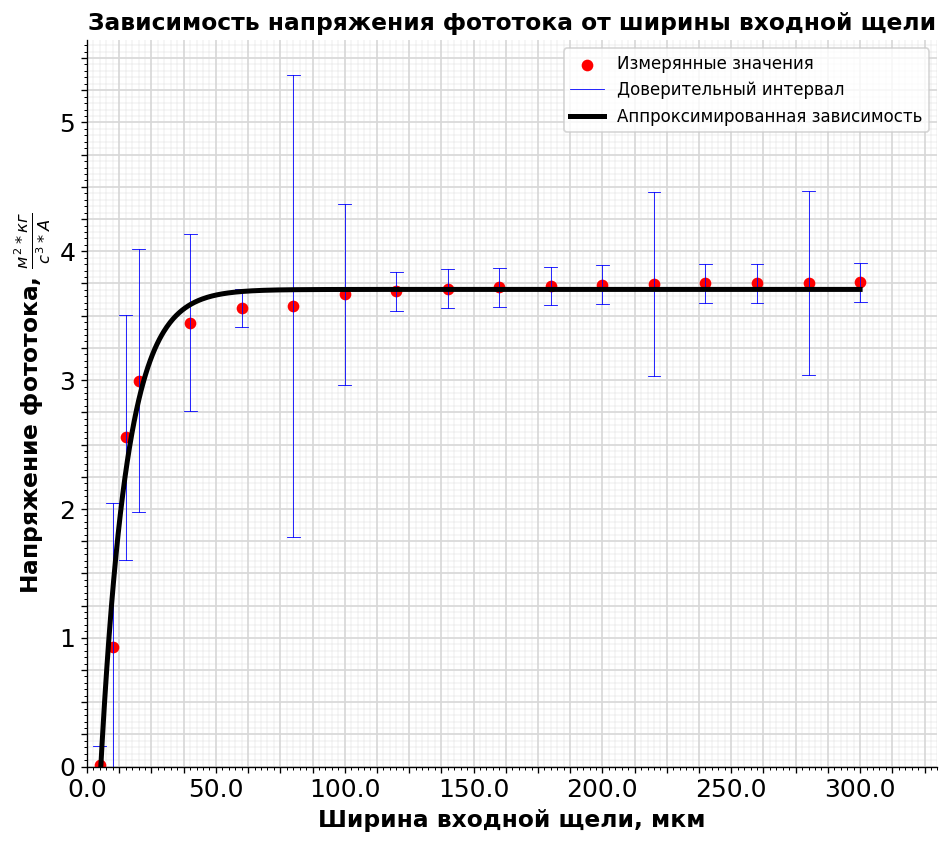

In [7]:
U1 = np.array([0.01, 0.02, 0.51, 1.86, 2.33, 2.63, 2.81, 2.95, 3.06, 3.13, 3.12, 2.92, 2.25, 1.39, 1.15, 1.00, 0.88, 0.76, 0.57, 0.41, 0.28, 0.19, 0.14,  0.1, 0.07, 0.05])
U2 = np.array([0.01, 0.02, 0.48, 1.83, 2.3, 2.6, 2.79, 2.93, 3.04, 3.1, 3.1, 2.89, 2.17, 1.34, 1.1, 0.97, 0.85, 0.72, 0.54, 0.39, 0.26, 0.18, 0.13, 0.09, 0.07, 0.05])
alpha = np.array([880, 820, 763, 720, 704, 689, 675, 662, 650, 637, 625, 613, 602, 592, 580, 573, 565, 557, 541, 526, 510, 498, 487, 477, 468, 460])

print((U1+U2)/2)

d = np.array([5, 10, 15, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300])
U11 = np.array([0.01, 0.87, 2.54, 2.98, 3.44, 3.56, 3.53, 3.67, 3.69, 3.71, 3.72, 3.73, 3.74, 3.75, 3.75, 3.75, 3.76, 3.76])
U12 = np.array([0.01, 0.99, 2.57, 3.01, 3.45, 3.56, 3.62, 3.66, 3.69, 3.71, 3.72, 3.73, 3.74, 3.74, 3.75, 3.75, 3.75, 3.76])

print((U11+U12)/2)

# figure_width = 18.  # cm
# figure_height = 20. # cm
draw_graph(figure_width, figure_height, d/50, np.array([U11, U12]), "Ширина входной щели, мкм", r"Напряжение фототока, $\frac{м^2*кг}{c^3*А}$", 
    "Зависимость напряжения фототока от ширины входной щели", "stud_graph", x_mod=50, max_y=1.5*np.max(U11), approximation_function=func_width)

c:\Users\Arseny\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[3.18713273 0.89481815 2.92839657 1.         0.13182146 1.        ]


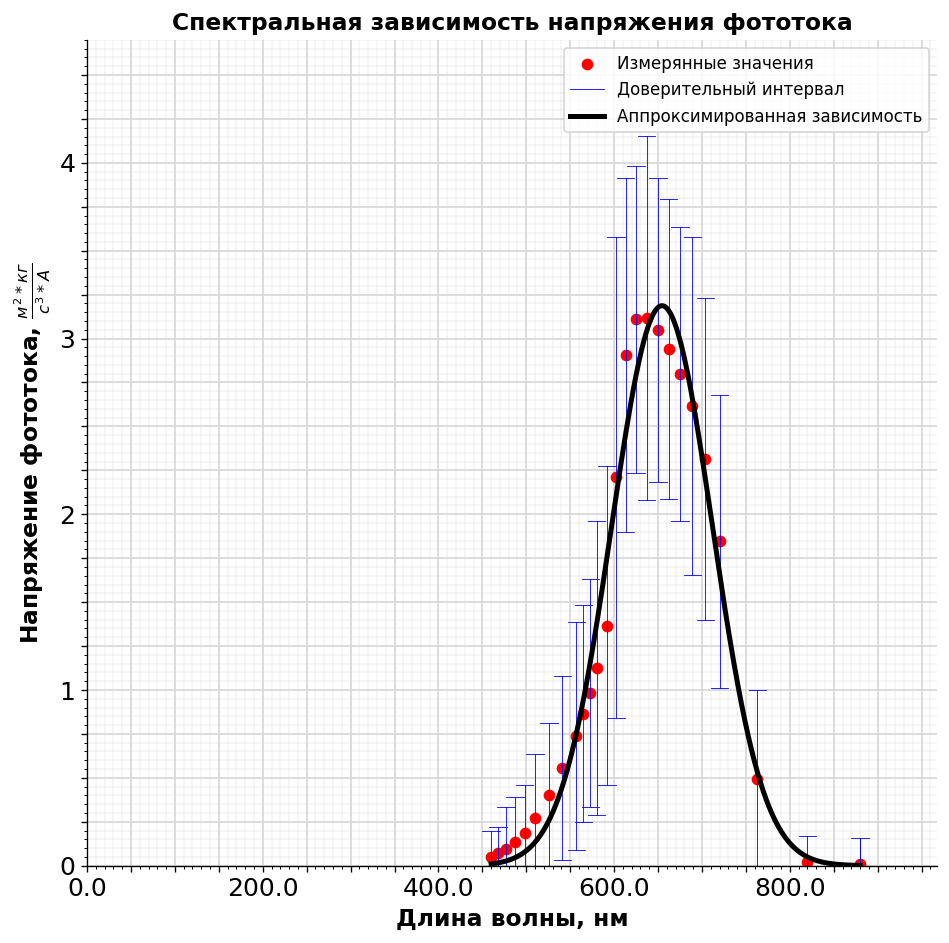

In [5]:
draw_graph(figure_width, figure_height, alpha/200, np.array([U1, U2]), "Длина волны, нм", r"Напряжение фототока, $\frac{м^2*кг}{c^3*А}$", 
    "Спектральная зависимость напряжения фототока", "stud_graph_2", x_mod=200, max_y=1.25*np.max(U11), approximation_function=func_voltage)

[0.01       0.02061856 0.5483871  2.12571429 2.79041916 3.8962963
 4.32307692 4.72       5.1        5.44347826 5.67272727 5.56190476
 4.5        2.89583333 2.5        2.27272727 2.0952381  1.9
 1.52       1.17142857 0.86153846 0.63333333 0.8        0.66666667
 0.56       0.5       ]
[5.03050468 0.78276457 3.0743197  0.205034  ]


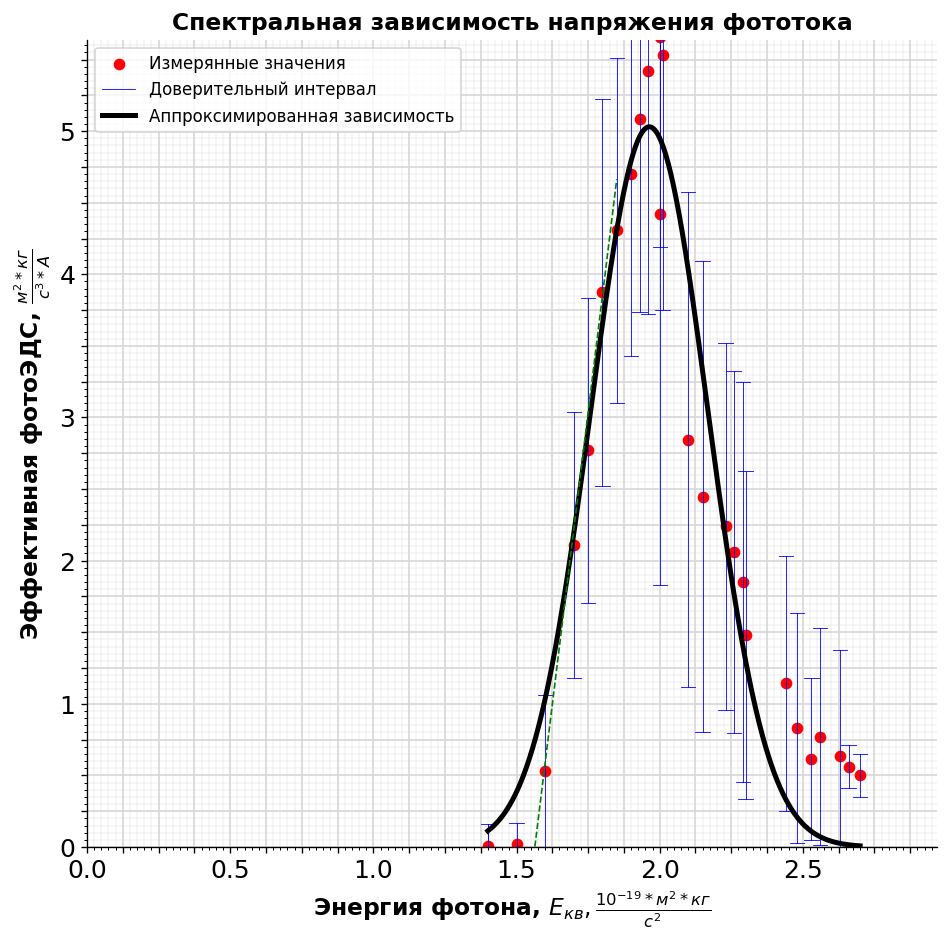

In [6]:
photon_energy = np.array([1.4,  1.5, 1.6, 1.7, 1.75, 1.8, 1.85, 1.9, 1.93, 1.96, 2,    2.01,   2,   2.1, 2.15, 2.23, 2.26, 2.29, 2.3, 2.44, 2.48, 2.53, 2.56, 2.63, 2.66, 2.7])
relativeI =     np.array([1,    0.97, 0.93, 0.875, 0.835, 0.675, 0.65, 0.625, 0.6, 0.575, 0.55, 0.525,  0.5, 0.48, 0.46, 0.44, 0.42, 0.4, 0.375, 0.35, 0.325, 0.3, 0.175, 0.15, 0.125, 0.1])
print(U1/relativeI)
draw_graph(figure_width, figure_height, photon_energy*2, np.array([U1/relativeI, U2/relativeI]),  r"Энергия фотона, $E_{кв}, \frac{10^{-19}*м^2*кг}{с^2}$",
    r"Эффективная фотоЭДС, $\frac{м^2*кг}{c^3*А}$", "Спектральная зависимость напряжения фототока", "stud_graph_3", x_mod=0.5, max_y=1.5*np.max(U11),
    approximation_function=func_voltage_2, other_function=np.poly1d(np.polyfit(photon_energy[2:6]*2, (U1[2:6]+U2[2:6])/(2*relativeI[2:6]),1))+0.1)